# The FIFA World Cup
The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. The current champion is Germany, which won its fourth title at the 2014 tournament in Brazil.

## Data - content 
The World Cups dataset show all information about all the World Cups in the history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline

In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
#import os
#print(os.listdir("../input"))

# Data - Overview

In [3]:
matches  = pd.read_csv("C:\\Users\\avina\\Downloads\\intership projects\\FIFA WC data\\WorldCupMatches.csv")
players  = pd.read_csv("C:\\Users\\avina\\Downloads\\intership projects\\FIFA WC data\\WorldCupPlayers.csv")
cups     = pd.read_csv("C:\\Users\\avina\\Downloads\\intership projects\\FIFA WC data\\WorldCups.csv")
display("MATCHES - DATA")
display(matches.head(3))
display("PLAYERS - DATA")
display(players.head(3))
display("WORLD CUPS - DATA")
display(cups.head(3))

'MATCHES - DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


'PLAYERS - DATA'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


'WORLD CUPS - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


# Total attendence of world cups by year
* The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

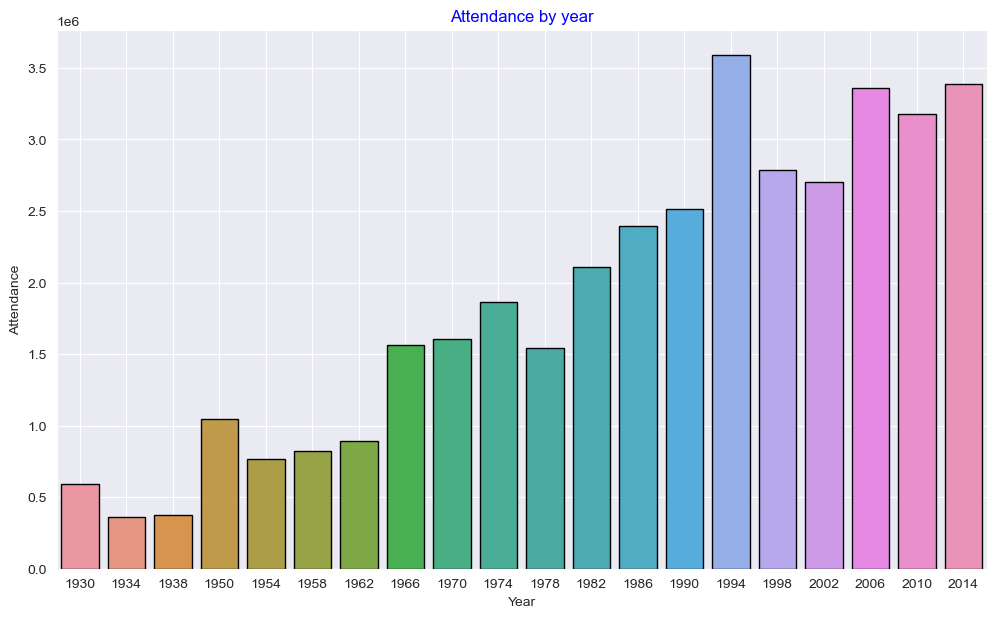

In [6]:
# Assuming att is your DataFrame
plt.figure(figsize=(12,7))
sns.barplot(x="Year", y="Attendance", data=att, linewidth=1, edgecolor="k")
plt.grid(True)
plt.title("Attendance by year", color='b')
plt.show()

# Average attendence by year
* A total of 3.43 million people watched the 64 games of the 2014 FIFA World Cup in Brazil live in the stadium. This meant that the average attendance per game was 53,758 , the highest average since the 1994 World Cup in the United States where average attendance is 68,991 per game. 

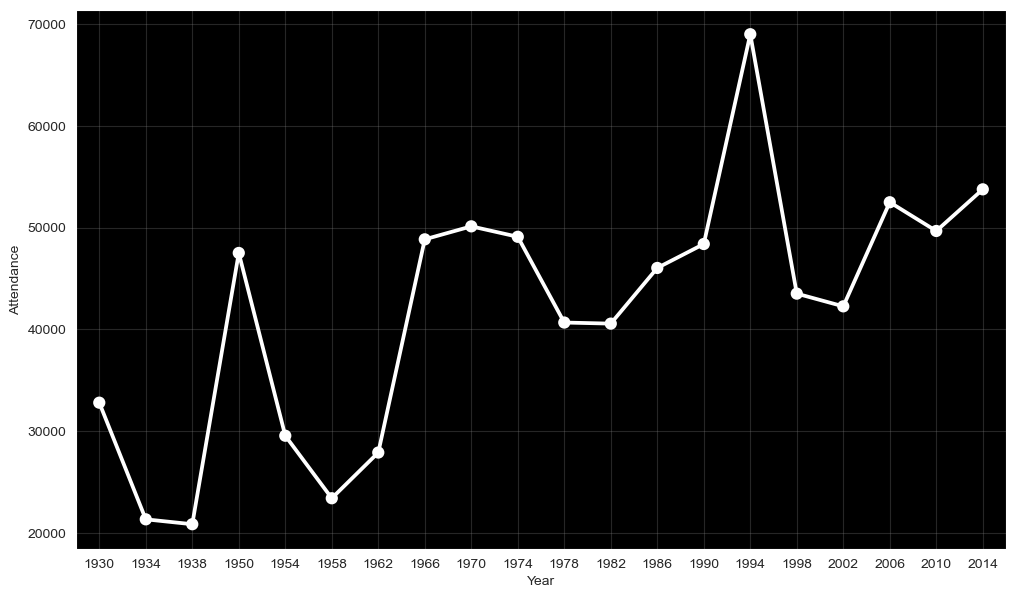

In [8]:
# Assuming att1 is your DataFrame
plt.figure(figsize=(12,7))
ax = sns.pointplot(x="Year", y="Attendance", data=att1, color="w")
ax.set_facecolor("k")
plt.grid(True, color="grey", alpha=.3)
plt.show()

# Total goals scored by year

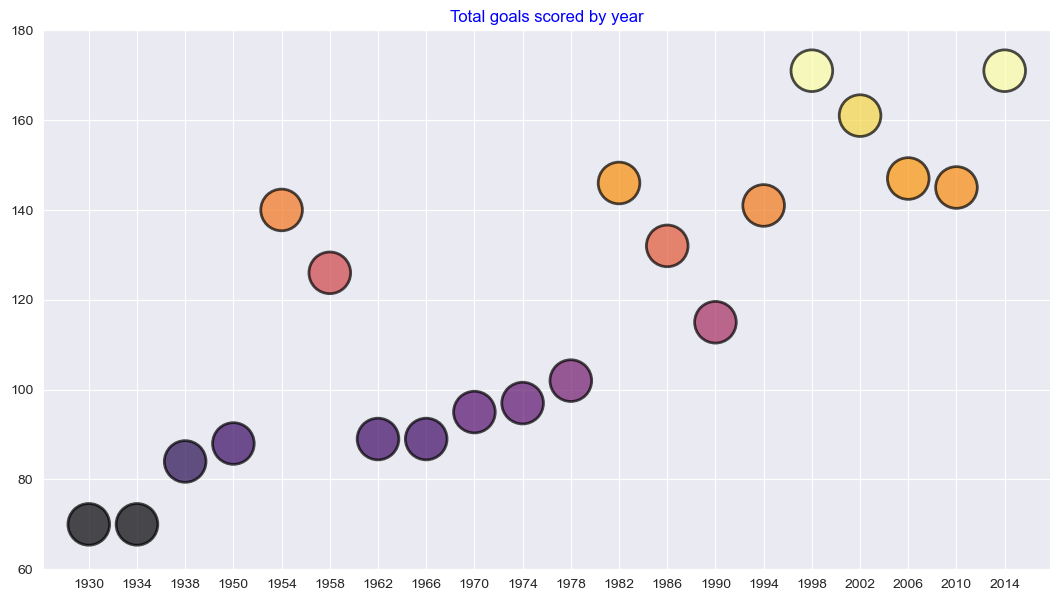

In [9]:
plt.figure(figsize=(13,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,
            c=cups["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k",)

#plt.colorbar()
plt.xticks(cups["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.show()


# Total matches played and qualified teams  by year
* In the tournaments between 1934 and 1978, 16 teams competed in each tournament, except in 1938, when Austria was absorbed into Germany after qualifying, leaving the tournament with 15 teams, and in 1950, when India, Scotland, and Turkey withdrew, leaving the tournament with 13 teams
* The tournament was expanded to 24 teams in 1982, and then to 32 in 1998,also allowing more teams from Africa, Asia and North America to take part. 

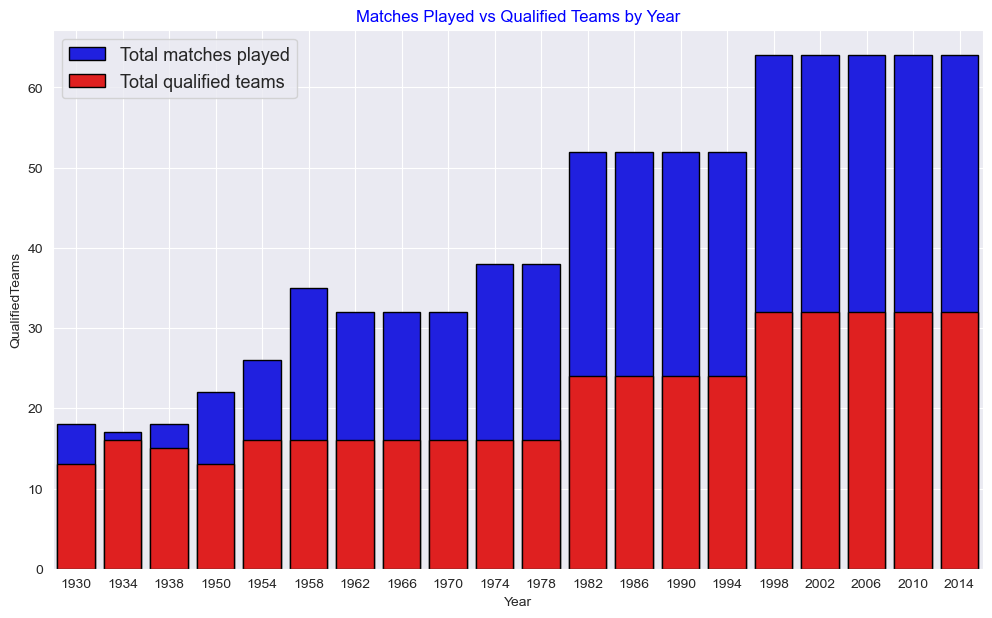

In [11]:
plt.figure(figsize=(12,7))
sns.barplot(x="Year", y="MatchesPlayed", data=cups, linewidth=1,
            edgecolor="k", color="b", label="Total matches played")
sns.barplot(x="Year", y="QualifiedTeams", data=cups, linewidth=1,
            edgecolor="k", color="r", label="Total qualified teams")
plt.legend(loc="best", prop={"size":13})
plt.grid(True)
plt.title("Matches Played vs Qualified Teams by Year", color='b')
plt.show()

# Matches with highest number of attendance

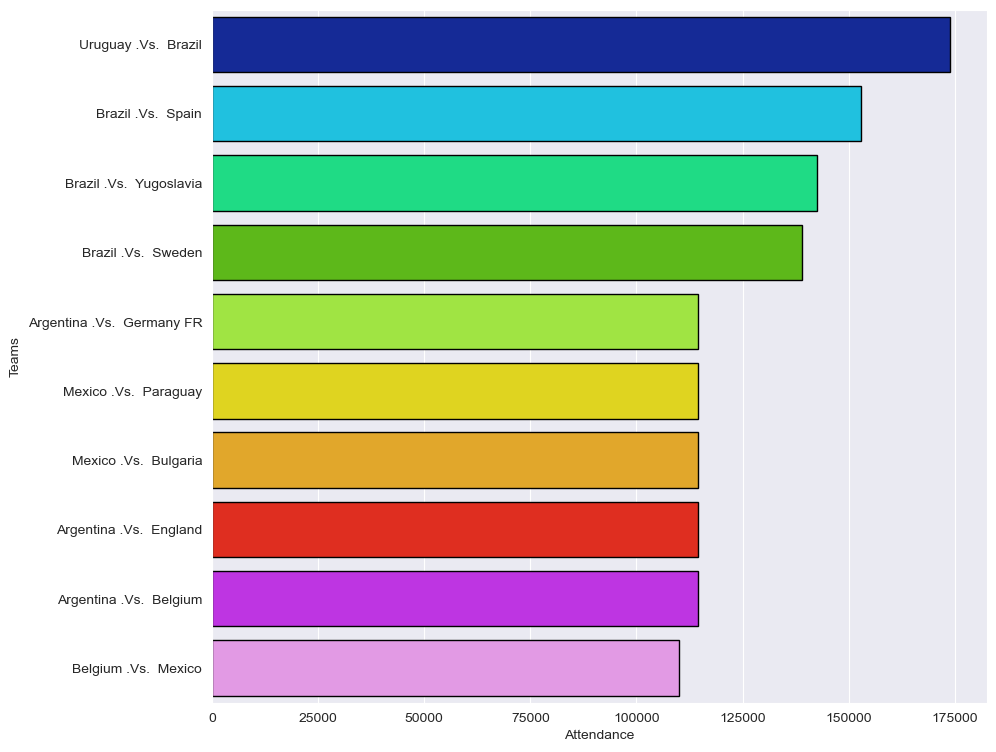

In [13]:
h_att["mt"] = h_att["Home Team Name"] + " .Vs.  " + h_att["Away Team Name"]

plt.figure(figsize=(10,9))
ax = sns.barplot(y=h_att["mt"], x=h_att["Attendance"], palette="gist_ncar",
                 linewidth=1, edgecolor="k")
plt.ylabel("Teams")
plt.xlabel("Attendance")
plt.show()

# Stadiums with highest average attendance

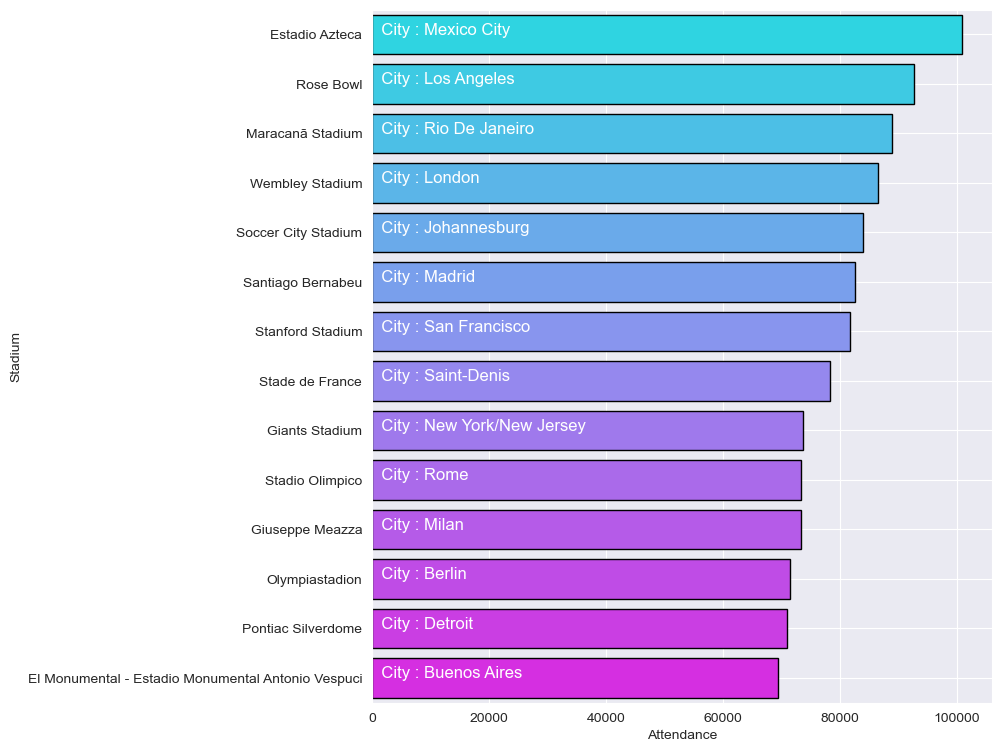

In [15]:
std = matches.groupby(["Stadium","City"])["Attendance"].mean().reset_index().sort_values(by="Attendance", ascending=False)

plt.figure(figsize=(8,9))
ax = sns.barplot(y=std["Stadium"][:14], x=std["Attendance"][:14], palette="cool",
                 linewidth=1, edgecolor="k")
plt.grid(True)
for i, j in enumerate("  City : " + std["City"][:14]):
    ax.text(.7,i,j,fontsize = 12,color='white')
plt.show()

# World cup final results by nation

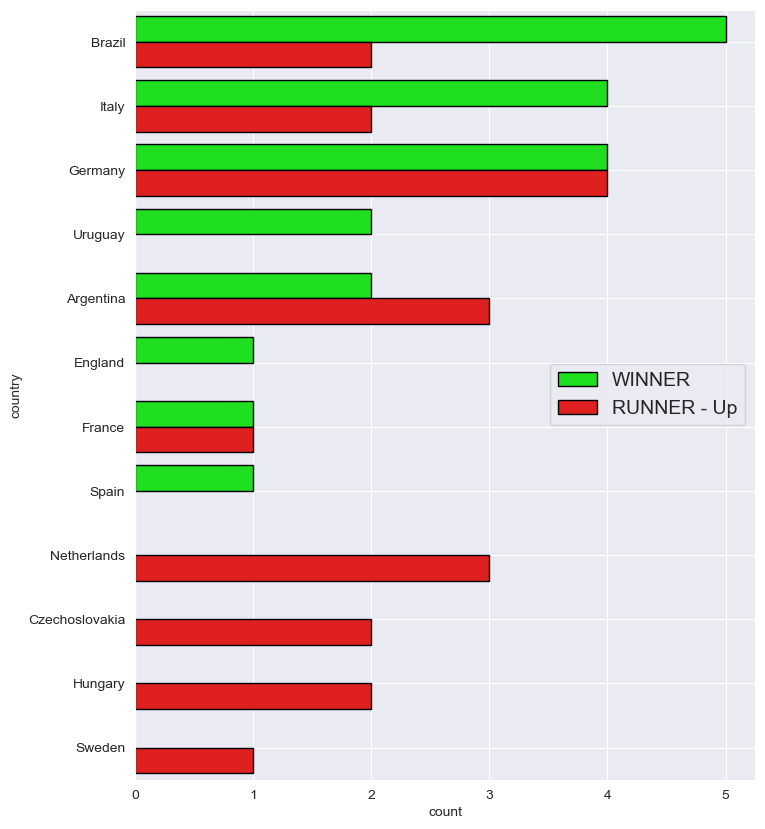

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

cou_t = pd.concat([cou_w, cou_r], axis=0)

plt.figure(figsize=(8,10))
sns.barplot(x="count", y="country", data=cou_t, hue="type", palette=["lime", "r"],
            linewidth=1, edgecolor="k")
plt.grid(True)
plt.legend(loc="center right", prop={"size":14})
plt.show()


# World cup final result for third and fourth place by nation

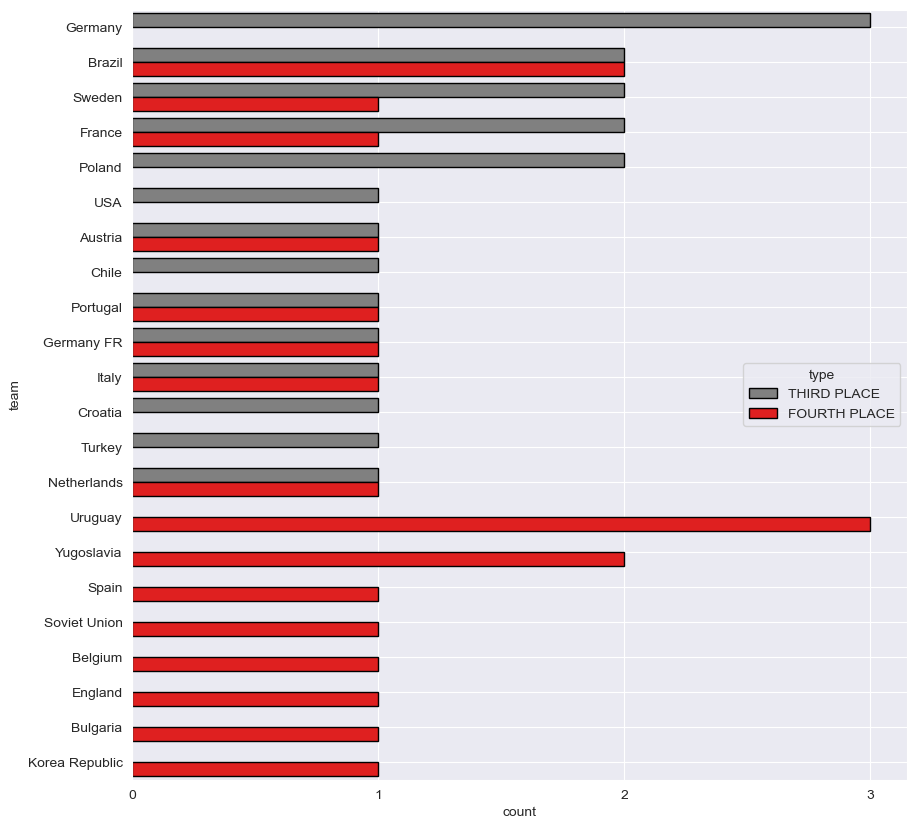

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plcs = pd.concat([thrd, frth], axis=0)

plt.figure(figsize=(10,10))
sns.barplot(x="count", y="team", data=plcs, hue="type",
            linewidth=1, edgecolor="k",
            palette=["grey", "r"])
plt.grid(True)
plt.xticks(np.arange(0, 4, 1))
plt.show()


# Teams with the most world cup matches

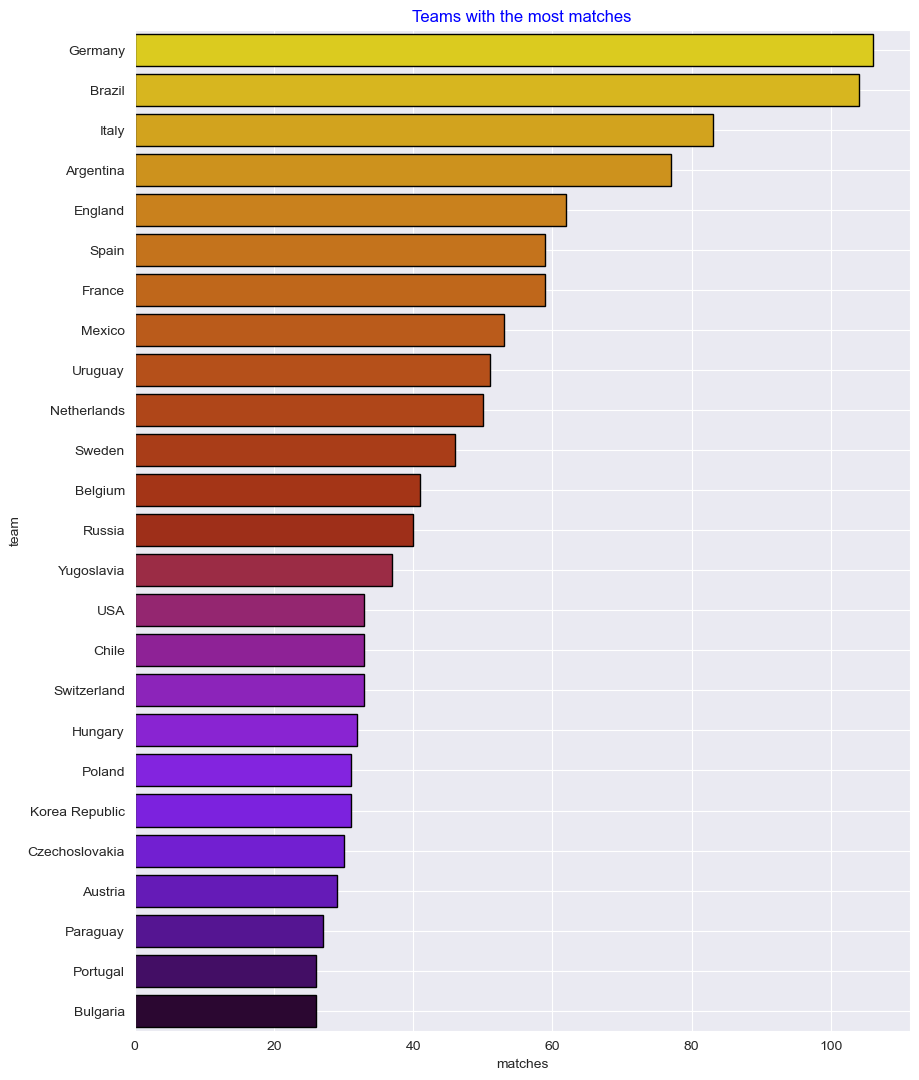

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches", ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot(x="matches", y="team", data=mt[:25], palette="gnuplot_r",
                 linewidth=1, edgecolor="k")
plt.grid(True)
plt.title("Teams with the most matches", color='b')
plt.show()


# Distribution of home and away goals

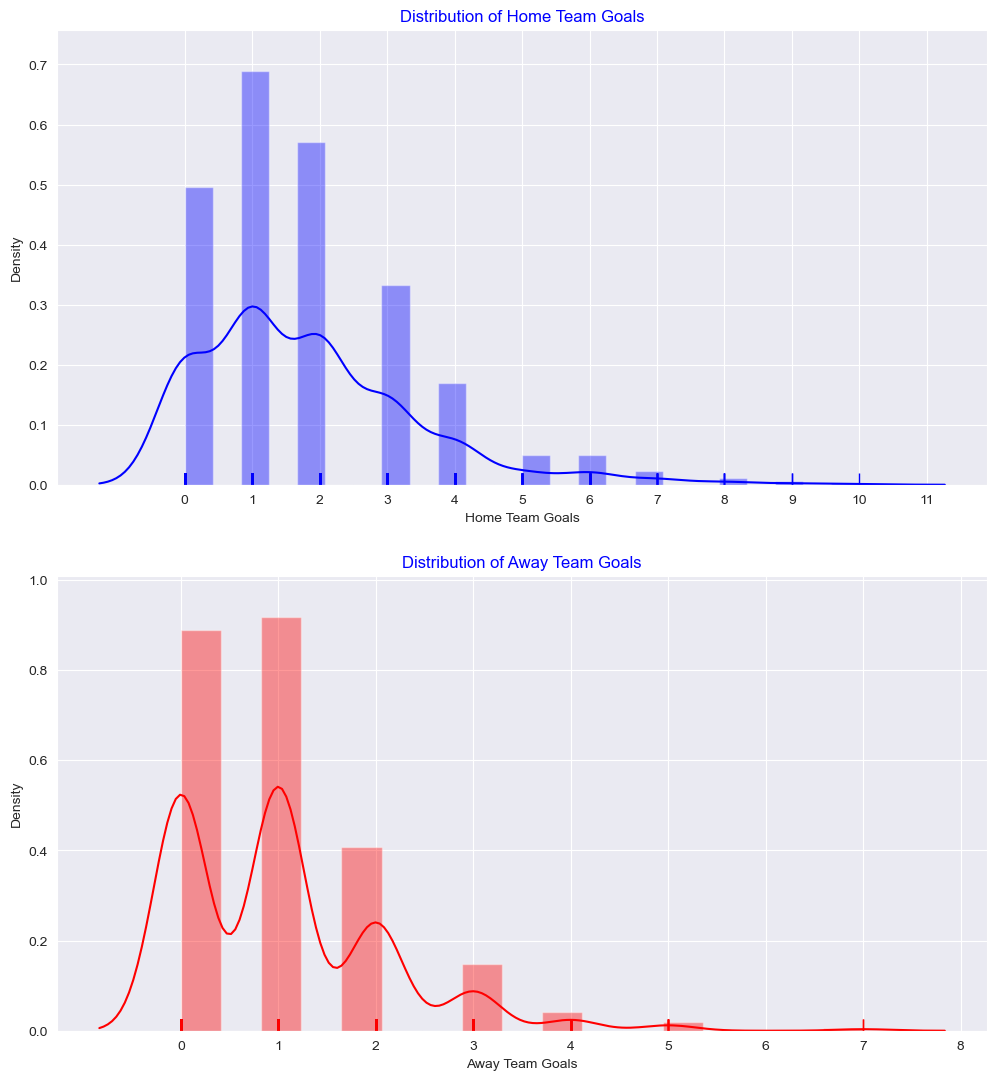

In [31]:
plt.figure(figsize=(12,13))
plt.subplot(211)
sns.distplot(matches["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Goals",color='b')


plt.subplot(212)
sns.distplot(matches["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Goals",color='b')
plt.show()

# Distribution of Half time Home and Away Team Goals

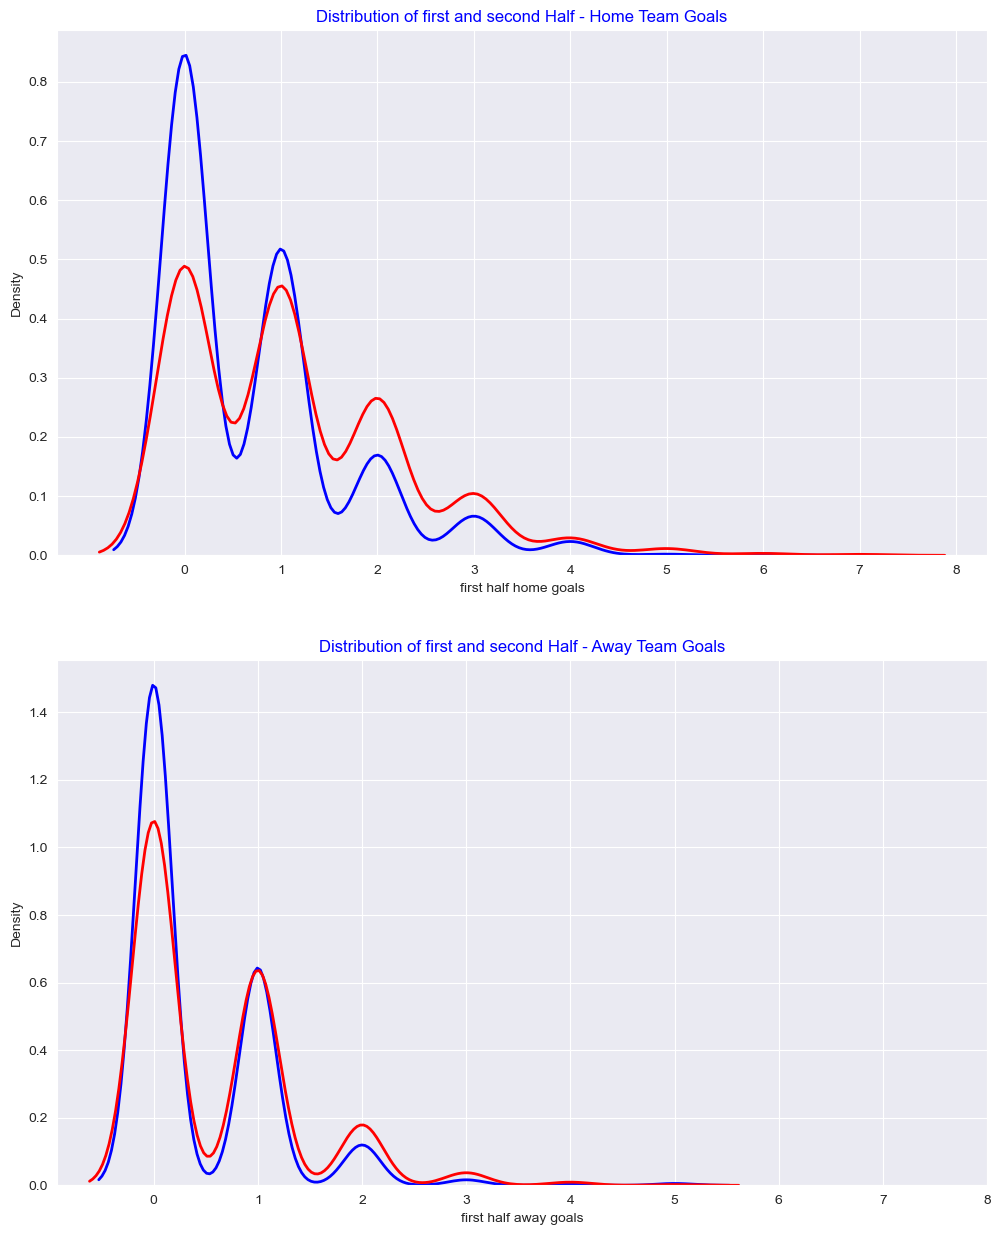

In [32]:
plt.figure(figsize=(12,15))
matches = matches.rename(columns={'Half-time Home Goals':"first half home goals",
                                  'Half-time Away Goals':"first half away goals"})

matches["second half home goals"] = matches["Home Team Goals"] - matches["first half home goals"]
matches["second half away goals"] = matches["Away Team Goals"] - matches["first half away goals"]

plt.subplot(211)
sns.kdeplot(matches["first half home goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half home goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Home Team Goals",color='b')

plt.subplot(212)
sns.kdeplot(matches["first half away goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half away goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Away Team Goals",color='b')
plt.show()

# Home and away goals by year

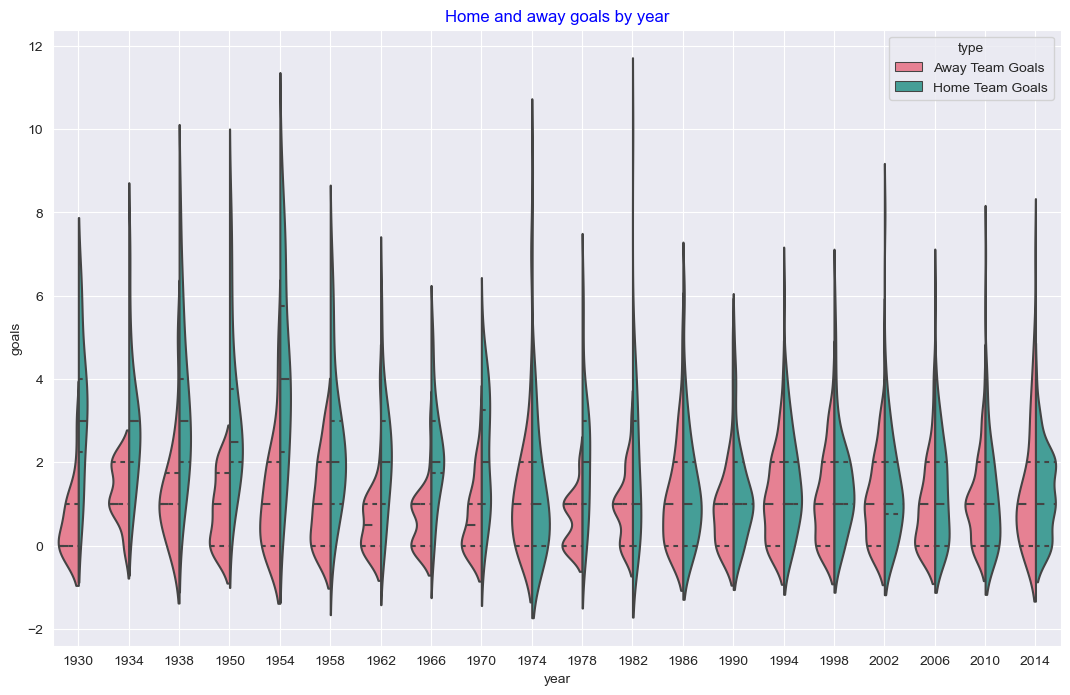

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

gls = pd.concat([ga, gh], axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(x=gls["year"], y=gls["goals"],
               hue=gls["type"], split=True, inner="quart", palette="husl")
plt.grid(True)
plt.title("Home and away goals by year", color='b')
plt.show()


# First half home and away goals by year

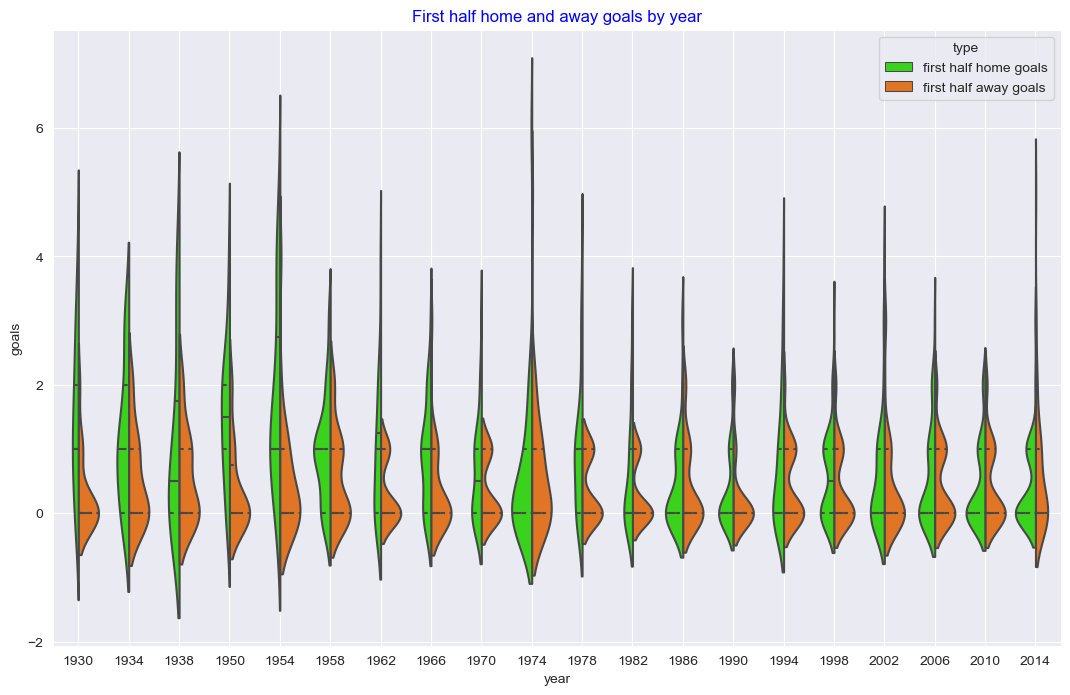

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

h_time = pd.concat([hhg, hag], axis=0)

plt.figure(figsize=(13, 8))
sns.violinplot(x=h_time["year"], y=h_time["goals"], hue=h_time["type"],
               split=True, inner="quart", palette="gist_ncar")
plt.grid(True)
plt.title("First half home and away goals by year", color='b')
plt.show()


# Match outcomes by home and away teams

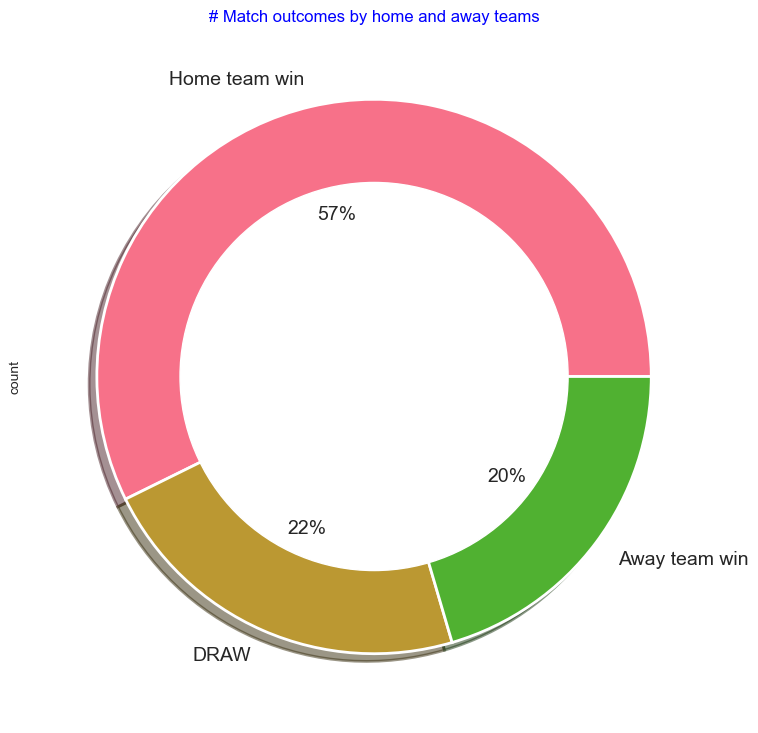

In [38]:
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)
plt.figure(figsize=(9,9))
matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("# Match outcomes by home and away teams",color='b')
plt.show()

## Countries with maximum wins , loses and draw matches in world cup

# Teams with highest fifa world cup goals

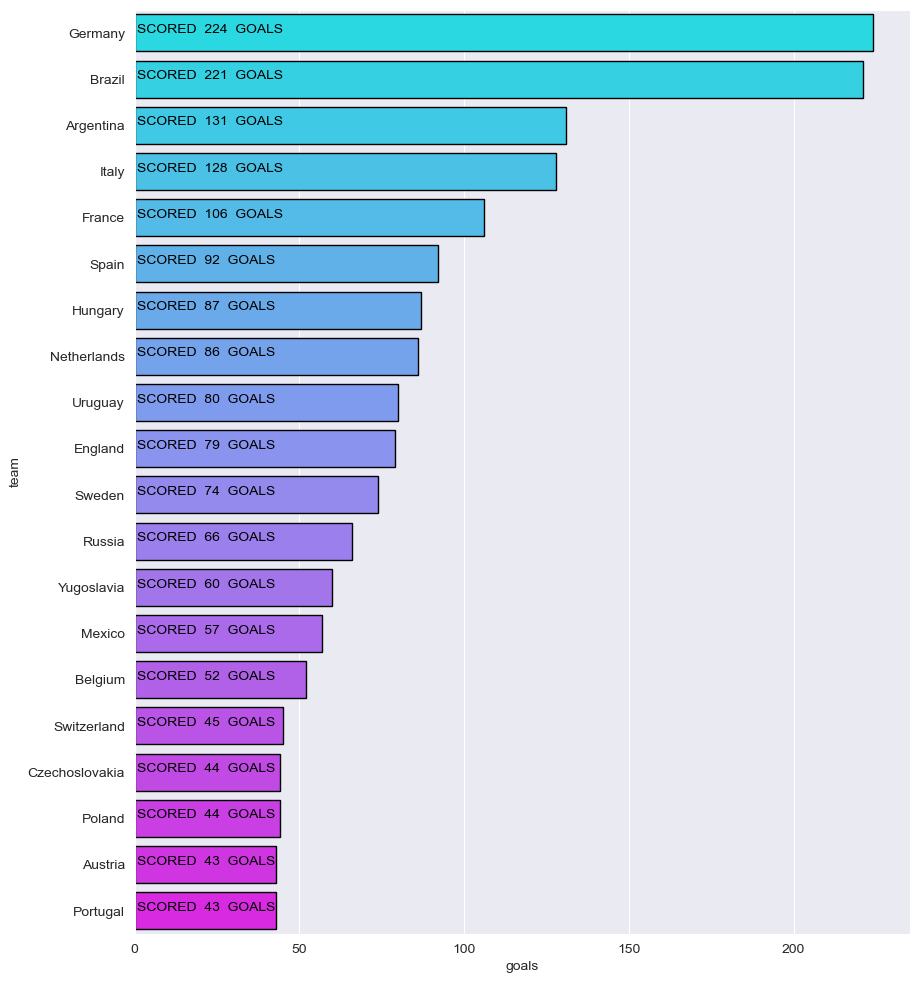

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(10, 12))
ax = sns.barplot(x="goals", y="team", data=total_goals[:20], palette="cool",
                 linewidth=1, edgecolor="k")
for i, j in enumerate("SCORED  " + total_goals["goals"][:20].astype(str) + "  GOALS"):
    ax.text(.7, i, j, fontsize=10, color="k")

plt.show()


# Highest total goals scored during a match 

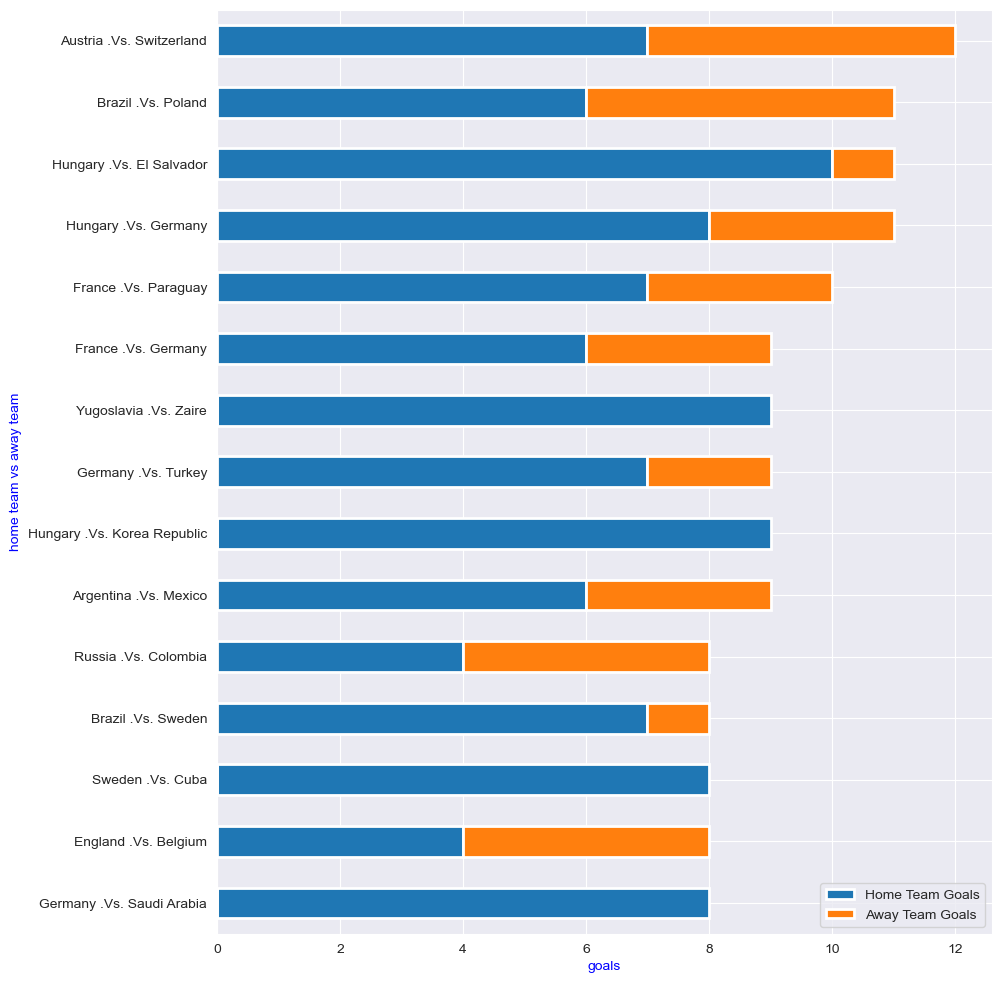

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals", ascending=True)
ax = hig_gl[["Home Team Goals", "Away Team Goals"]].plot(kind="barh", stacked=True,
                                                        figsize=(10, 12), linewidth=2,
                                                        edgecolor="w")
plt.ylabel("home team vs away team", color="b")
plt.xlabel("goals", color="b")
plt.show()


# Total goals scored during games by year

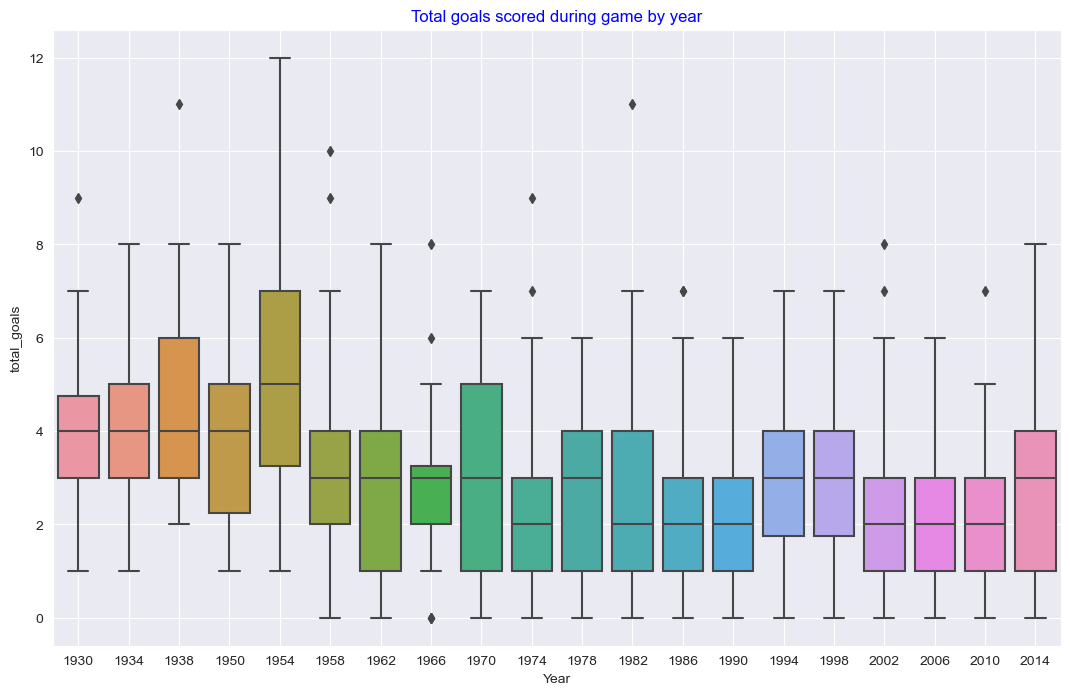

In [46]:
plt.figure(figsize=(13,8))
sns.boxplot(y=matches["total_goals"],x=matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year",color='b')
plt.show()
